In [1]:
import pandas as pd

In [4]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [5]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [8]:
logs.platform.nunique()

3

In [9]:
user_data.shape

(2954, 3)

In [10]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [12]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [14]:
user_data.age.describe()

count    2954.000000
mean       44.196005
std        14.248336
min        20.000000
25%        32.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: age, dtype: float64

In [16]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [18]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

<li><b><i>Какой клиент совершил больше всего успешных операций? </i></b></li>

In [26]:
#интересует колонка user_data так как в logs нет колонки success
success_number = logs.query('success == True') \
                    .groupby('client', as_index = False) \
                    .agg({'platform': 'count'}) \
                    .rename(columns={'platform': 'success_number'}) \
                    .sort_values('success_number', ascending=False)

In [27]:
maximum_success = success_number.success_number.max()

In [35]:
succesfull__clients = success_number.query('success_number == @maximum_success') \
                .sort_values('client') \
                .client \
                .tolist()

In [36]:
succesfull__clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

<li><b><i>С какой платформы осуществляется наибольшее количество успешных операций?</i></b></li>

In [40]:
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

<li><b><i>Какую платформу предпочитают премиумные клиенты?</i></b></li>

In [41]:
data = user_data.merge(logs)

In [43]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [45]:
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

<li><b><i>Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)</i></b></li>

In [46]:
import seaborn as sns

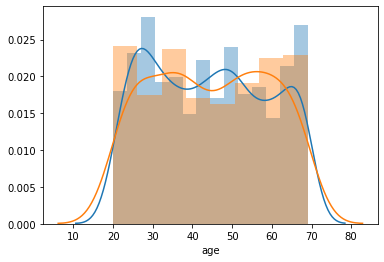

In [50]:
sns.distplot(data.query('premium == False').age)
sns.distplot(data.query('premium == True').age)

In [51]:
import matplotlib.pyplot as plt

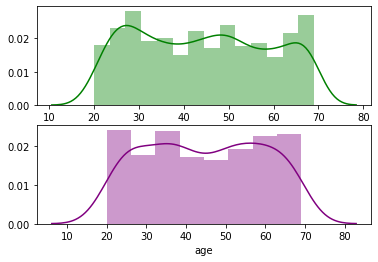

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(data.query('premium == False').age, ax=ax[0], color='green')
sns.distplot(data.query('premium == True').age, ax=ax[1], color='purple')


<li><b><i>Постройте график распределения числа успешных операций: </i></b></li>

<p><i>x – число успешных операций</i></p>
<i>y – число клиентов, совершивших столько успешных операций</i>

In [59]:
client_vs_success_number = data.groupby('client') \
                                .agg({'success': 'sum'})

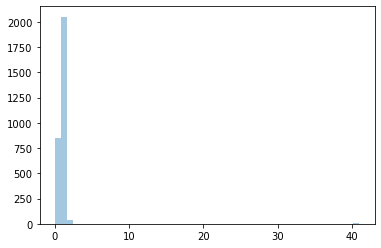

In [61]:
sns.distplot(client_vs_success_number, kde=False)

In [62]:
client_vs_success_number.success.value_counts()

1.0     2051
0.0      850
2.0       42
41.0       9
3.0        1
40.0       1
Name: success, dtype: int64

<li><b><i>Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. </i></b></li>
<p><i>По оси x – возраст, y – число успешных операций. </i></p>

<p><i><b>Вопрос:</b> Клиенты какого возраста совершили наибольшее количество успешных действий?</i></p>

In [67]:
age_vs_success_number = data.query('platform == "computer"') \
                            .groupby('age', as_index=False) \
                            .agg({'success': 'sum'})

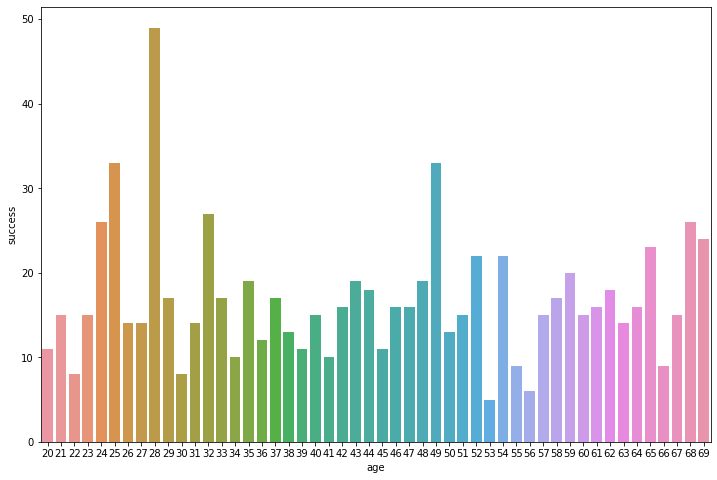

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x=age_vs_success_number.age, y=age_vs_success_number.success)